# Red Recurrente LSTM
## Imports Necesarios

In [80]:
# Imports necesarios
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
#from keras.layers import Flatten
#from keras.optimizers import Adam
#from pyimagesearch import models

## Cargar archivo de Entradas

In [81]:
np.random.seed(1)

In [93]:

#cargamos los datos de entrada
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)
#veamos cuantas dimensiones y registros contiene
#data.shape
# Ver los 1ros registros
data.head()

,ws,wp1t-44,wp1t-43,wp1t-42,wp1t-41,wp1t-40,wp1t-39,wp1t-38,wp1t-37,wp1t-36,...,wp1t-9,wp1t-8,wp1t-7,wp1t-6,wp1t-5,wp1t-4,wp1t-3,wp1t-2,wp1t-1,wp1
4,2.93,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.254218,0.035
5,2.96,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.254218,0.035000,0.005
6,2.81,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.254219,0.035000,0.005000,0.000
7,2.73,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.254219,0.035000,0.005000,0.000000,0.000
8,2.87,0.25423,0.254231,0.25423,0.25423,0.254229,0.254228,0.254228,0.254229,0.254228,...,0.254221,0.25422,0.25422,0.25422,0.254219,0.035000,0.005000,0.000000,0.000000,0.010


## Separar Datos de Entrenamiento (Train) y Test

In [94]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
data_train, data_test = train_test_split(data,test_size=0.2, random_state=200)

dataset_train = data_train.values
x_train = dataset_train[:,0:45]
y_train = dataset_train[:,45]

dataset_test = data_test.values
x_test = dataset_test[:,0:45]
y_test = dataset_test[:,45]

#dataX2 =  pd.DataFrame()
#dataX2["ws"] =data_train["ws"]
#dataX2["wd"] =data_train["wd"]
#dataX2["anno"] =data_train["anno"]
#dataX2["mes"] =data_train["mes"]

#x_train= np.array(dataX2,"float32")
#y_train = np.array(data_train['wp1'].values,"float32")

#y_train  

#print(y_train[0:1].shape) 

#x_train.shape

#x_test
x_train[0]

array([5.35486486, 0.266     , 0.266     , 0.266     , 0.266     ,
       0.266     , 0.266     , 0.266     , 0.266     , 0.272     ,
       0.278     , 0.283     , 0.289     , 0.295     , 0.301     ,
       0.306     , 0.312     , 0.318     , 0.324     , 0.329     ,
       0.335     , 0.341     , 0.347     , 0.352     , 0.358     ,
       0.364     , 0.37      , 0.375     , 0.381     , 0.387     ,
       0.393     , 0.398     , 0.404     , 0.433     , 0.439     ,
       0.444     , 0.45      , 0.456     , 0.462     , 0.467     ,
       0.473     , 0.479     , 0.485     , 0.49      , 0.496     ])

In [95]:
y_train[0]

0.502

## Adaptar Datos para LSTM

In [96]:
timesteps = 1

#reshape
x_train_re = x_train.reshape((x_train.shape[0], timesteps, x_train.shape[1]))
x_train = x_train_re


x_test_re = x_test.reshape((x_test.shape[0], timesteps, x_test.shape[1]))
x_test = x_test_re


#print(x_train.shape, y_train.shape)

In [97]:
x_train.shape[1]

1

In [98]:
x_train.shape[2]

45

In [99]:
#x_train

In [100]:
#y_train

In [101]:
nro_train = len(data_train)

## Crear Modelo, Entrenarlo y Predecir

In [179]:

csv_logger = keras.callbacks.CSVLogger('training.log', separator=',', append=False)

## cargamos las 4 combinaciones de las compuertas XOR
#training_data = x_train
 
# y estos son los resultados que se obtienen, en el mismo orden
#target_data = y_train


# import norm
#from keras.constraints import max_norm
# instantiate norm
#norm = max_norm(3.0)
#keras.callbacks.Callback()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mch = ModelCheckpoint('best_model_lstm.h5', monitor='val_mean_squared_error', mode='min', verbose=1, save_best_only=True)


#, kernel_constraint=max_norm(3), bias_constraint=max_norm(3))
model = Sequential()
model.add(LSTM(45, return_sequences = True,input_shape=(x_train.shape[1], x_train.shape[2])))


model.add(LSTM(270, return_sequences = True, activation='relu'))
model.add(LSTM(270, return_sequences = True, activation='relu'))
model.add(LSTM(270, return_sequences = True, activation='relu'))
model.add(LSTM(270, return_sequences = True, activation='relu'))
model.add(LSTM(270, return_sequences = True, activation='relu'))
model.add(LSTM(270, return_sequences = False, activation='relu'))

model.add(Dense(1, activation="linear"))


model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['mean_squared_error'])

#'binary_accuracy'

#metrics=['accuracy']
 
hist=model.fit(x_train, y_train, epochs=1000, batch_size=45, verbose=2, shuffle=False, validation_data=(x_test, y_test),callbacks=[es, mch])
#validation_data=(x_test, y_test),
 
# evaluamos el modelo
#scores = model.evaluate(x_train, y_train)
 
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print (model.predict(x_train).round())

Train on 76876 samples, validate on 19220 samples
Epoch 1/1000
 - 350s - loss: 0.0536 - mean_squared_error: 0.0093 - val_loss: 0.0375 - val_mean_squared_error: 0.0051

Epoch 00001: val_mean_squared_error improved from inf to 0.00507, saving model to best_model_lstm.h5
Epoch 2/1000
 - 330s - loss: 0.0365 - mean_squared_error: 0.0051 - val_loss: 0.0322 - val_mean_squared_error: 0.0048

Epoch 00002: val_mean_squared_error improved from 0.00507 to 0.00485, saving model to best_model_lstm.h5
Epoch 3/1000
 - 270s - loss: 0.0330 - mean_squared_error: 0.0050 - val_loss: 0.0312 - val_mean_squared_error: 0.0047

Epoch 00003: val_mean_squared_error improved from 0.00485 to 0.00469, saving model to best_model_lstm.h5
Epoch 4/1000
 - 281s - loss: 0.0310 - mean_squared_error: 0.0048 - val_loss: 0.0279 - val_mean_squared_error: 0.0045

Epoch 00004: val_mean_squared_error improved from 0.00469 to 0.00451, saving model to best_model_lstm.h5
Epoch 5/1000
 - 294s - loss: 0.0300 - mean_squared_error: 0.00

 - 309s - loss: 0.0218 - mean_squared_error: 0.0031 - val_loss: 0.0222 - val_mean_squared_error: 0.0032

Epoch 00041: val_mean_squared_error did not improve from 0.00322
Epoch 42/1000
 - 351s - loss: 0.0217 - mean_squared_error: 0.0031 - val_loss: 0.0237 - val_mean_squared_error: 0.0032

Epoch 00042: val_mean_squared_error did not improve from 0.00322
Epoch 43/1000
 - 401s - loss: 0.0220 - mean_squared_error: 0.0031 - val_loss: 0.0262 - val_mean_squared_error: 0.0034

Epoch 00043: val_mean_squared_error did not improve from 0.00322
Epoch 44/1000
 - 343s - loss: 0.0215 - mean_squared_error: 0.0030 - val_loss: 0.0212 - val_mean_squared_error: 0.0033

Epoch 00044: val_mean_squared_error did not improve from 0.00322
Epoch 45/1000
 - 271s - loss: 0.0214 - mean_squared_error: 0.0030 - val_loss: 0.0241 - val_mean_squared_error: 0.0035

Epoch 00045: val_mean_squared_error did not improve from 0.00322
Epoch 46/1000
 - 261s - loss: 0.0218 - mean_squared_error: 0.0031 - val_loss: 0.0225 - val_mea

 - 229s - loss: 0.0190 - mean_squared_error: 0.0024 - val_loss: 0.0216 - val_mean_squared_error: 0.0033

Epoch 00085: val_mean_squared_error did not improve from 0.00314
Epoch 86/1000
 - 224s - loss: 0.0189 - mean_squared_error: 0.0024 - val_loss: 0.0252 - val_mean_squared_error: 0.0033

Epoch 00086: val_mean_squared_error did not improve from 0.00314
Epoch 87/1000
 - 232s - loss: 0.0188 - mean_squared_error: 0.0023 - val_loss: 0.0261 - val_mean_squared_error: 0.0033

Epoch 00087: val_mean_squared_error did not improve from 0.00314
Epoch 88/1000
 - 240s - loss: 0.0185 - mean_squared_error: 0.0023 - val_loss: 0.0223 - val_mean_squared_error: 0.0033

Epoch 00088: val_mean_squared_error did not improve from 0.00314
Epoch 89/1000
 - 241s - loss: 0.0188 - mean_squared_error: 0.0024 - val_loss: 0.0238 - val_mean_squared_error: 0.0033

Epoch 00089: val_mean_squared_error did not improve from 0.00314
Epoch 90/1000
 - 291s - loss: 0.0186 - mean_squared_error: 0.0023 - val_loss: 0.0223 - val_mea


Epoch 00129: val_mean_squared_error did not improve from 0.00306
Epoch 130/1000
 - 314s - loss: 0.0166 - mean_squared_error: 0.0019 - val_loss: 0.0241 - val_mean_squared_error: 0.0032

Epoch 00130: val_mean_squared_error did not improve from 0.00306
Epoch 131/1000
 - 283s - loss: 0.0169 - mean_squared_error: 0.0019 - val_loss: 0.0211 - val_mean_squared_error: 0.0032

Epoch 00131: val_mean_squared_error did not improve from 0.00306
Epoch 132/1000
 - 283s - loss: 0.0169 - mean_squared_error: 0.0019 - val_loss: 0.0230 - val_mean_squared_error: 0.0032

Epoch 00132: val_mean_squared_error did not improve from 0.00306
Epoch 133/1000
 - 312s - loss: 0.0166 - mean_squared_error: 0.0019 - val_loss: 0.0212 - val_mean_squared_error: 0.0031

Epoch 00133: val_mean_squared_error did not improve from 0.00306
Epoch 134/1000
 - 299s - loss: 0.0165 - mean_squared_error: 0.0018 - val_loss: 0.0226 - val_mean_squared_error: 0.0031

Epoch 00134: val_mean_squared_error did not improve from 0.00306
Epoch 135

In [180]:
# load the saved model
best_model = load_model('best_model_lstm.h5')

In [181]:
#best_model.summary()

In [182]:
#y_pred_train = model.predict(x_train)    
#y_pred_test = model.predict(x_test) 

y_pred_train = best_model.predict(x_train)    
y_pred_test = best_model.predict(x_test) 

## Obtener Metricas del Modelo

In [183]:
# evaluamos el modelo
#scores = model.evaluate(x_train, y_train)
scores = best_model.evaluate(x_train, y_train)

76876/76876 [==============================] - 65s 847us/step


In [184]:
#print("R2:",  r2_keras(y_train, y_pred_train) )
print("\n%s: %.2f%%" % (best_model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (best_model.metrics_names[1], scores[1]*100))
#print("\n%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
#print (model.predict(x_train).round())


loss: 1.67%

mean_squared_error: 0.18%


In [185]:
from sklearn.metrics import r2_score
print('Coefficient of determination Train (R^2): %.2f' % r2_score(y_train, y_pred_train))
print('Coefficient of determination Test (R^2): %.2f' % r2_score(y_test, y_pred_test))

Coefficient of determination Train (R^2): 0.97
Coefficient of determination Test (R^2): 0.95


## Graficar Resultados

In [186]:
neuronas =100
#pred_train = model.predict(x_train)
corr = np.corrcoef(y_train, y_pred_train[:, 0])

In [187]:
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]

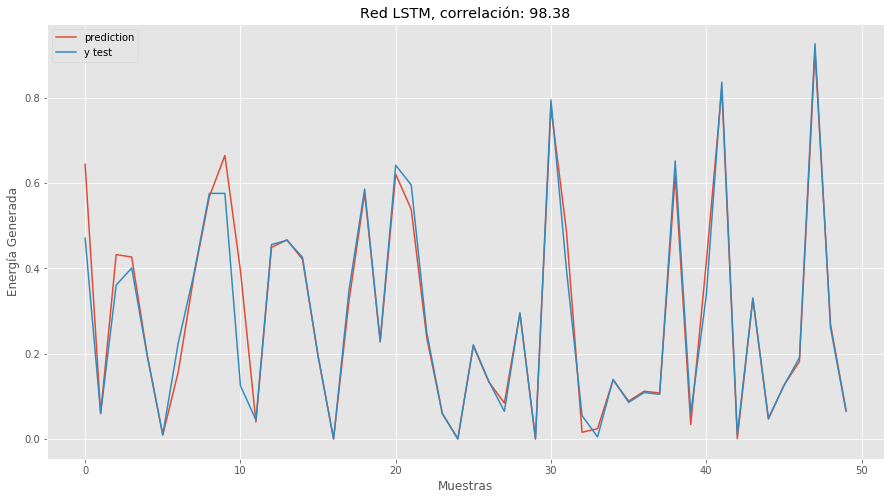

In [188]:
plt.plot(pred_test_plot, label ="prediction")
plt.plot(y_test_plot, label ="y test")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("Red LSTM, correlación: %.2f" % ( corr[1][0] * 100) )
plt.ylabel("Energía Generada")
plt.xlabel("Muestras")
plt.legend()
plt.show()

In [189]:
#registro = pd.read_csv('training.log', sep=",")
#plt.plot(registro["epoch"].values, registro["loss"].values)
#plt.title("Error LSTM con %i neuronas, correlacion: %.2f" % (neuronas, corr[1][0] * 100))
#plt.ylabel("Error")
#plt.xlabel("Epocas")
#plt.show()

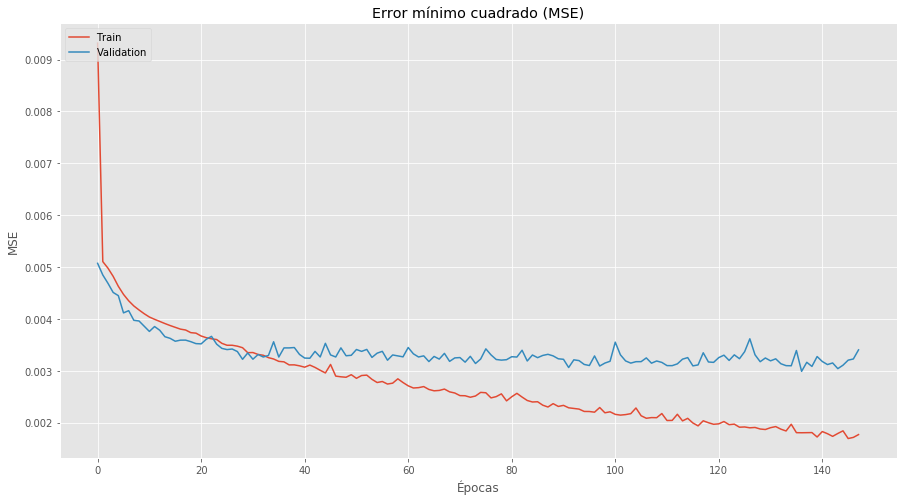

In [190]:
# Plot training & validation accuracy values
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('Error mínimo cuadrado (MSE)')
plt.ylabel('MSE')
plt.xlabel('Épocas')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [191]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


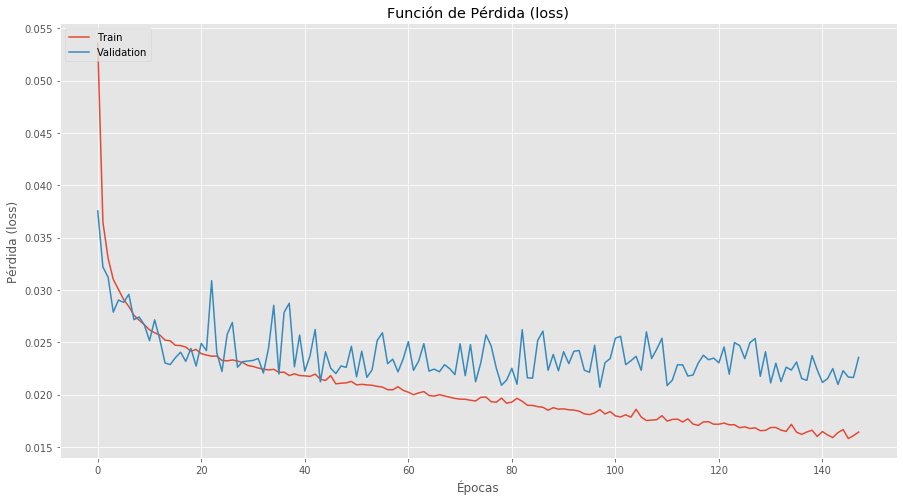

In [192]:
# Plot training & validation accuracy values
#plt.plot(hist.history['binary_accuracy'])
##plt.plot(hist.history['val_binary_accuracy'])
#plt.title('Model accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Función de Pérdida (loss)')
plt.ylabel('Pérdida (loss)')
plt.xlabel('Épocas')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [135]:
## Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por 13 ws (wind speed mph),
# según nuestro modelo, hacemos:

#y_12 = regr.predict([[12,70.4,2012,7]])
#test= np.array([[3.66,106.24,2009,7]])
#y_12 = model.predict(test)


#print(y_12)

In [193]:

#df_test = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/test_24.csv")
#veamos cuantas dimensiones y registros contiene

# Ver los 1ros registros
#df_test.head()

In [194]:
#df_test.describe()

In [195]:
#x_test = df_test[:,1:5]
#y_train = dataset[:,5

In [196]:
 
#df = df_test.values
#x_test = df[:,0:4]

#x_test

#y_12 = model.predict(x_test)

#print(y_12)

In [197]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_LSTM.csv')
